In [3]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy import fftpack
from numpy import savetxt
from scipy.signal import lfilter, firwin

In [64]:
noise = 10
time_step = 0.05
period = 1.5

time_vec = np.arange(0, 10, time_step)
wave = 5*(10 * np.sin(2 * np.pi / period * time_vec)+20)
noisy_wave = wave + noise * np.random.randn(time_vec.size)

In [68]:
for i in range(200):
    print(noisy_wave.astype(int)[i])
print(len(noisy_wave))

94
105
118
128
149
142
156
145
136
146
144
119
122
116
111
124
71
76
68
46
57
38
45
54
62
49
52
64
88
96
100
92
116
119
134
149
143
150
151
142
156
119
123
128
104
117
85
91
74
54
50
55
48
47
51
68
57
74
78
89
93
104
97
125
132
133
158
156
151
115
135
140
139
122
102
103
94
80
75
71
46
52
62
63
56
69
71
71
89
75
87
115
132
137
139
134
129
158
166
149
153
127
146
127
123
108
96
71
59
58
51
38
61
41
46
72
53
80
80
82
94
96
95
131
131
147
145
140
181
157
149
136
131
115
94
101
94
69
81
78
64
45
56
46
52
60
62
80
90
81
111
117
119
128
154
134
155
152
159
141
148
140
130
134
95
104
110
90
61
56
71
61
65
38
51
58
77
73
77
90
77
91
123
143
134
153
145
133
157
144
140
136
107
125
131
100
87
62
78
48
200


In [66]:
fpga = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,251,236,177,0,253,246,216,30,128,251,236,49,0,253,246,216,30,128,251,236,49,0,253,246,216,30,128,251,236,49,0,253,246,216,30,128,251,236,49,0,253,246,216,30,128,251,236,49,0,253,246,216,30,128,251,236,49,0,253,246,216,30,128,251,236,49,0,253,246,216,30,128,251,236,49,0,253,246,216,30,0,251,236,177,0,253,246,216,30,0,251,236,177,0,253,246,216,30,0,251,236,177,0,253,246,216,30,0,251,236,177,0,253,246,216,30,0,251,236,177,0,253,246,216,30,0,251,236,177,0,253,246,216,30,0,251,236,177,0,253,246,216,30,0,251,236,177,0,253])

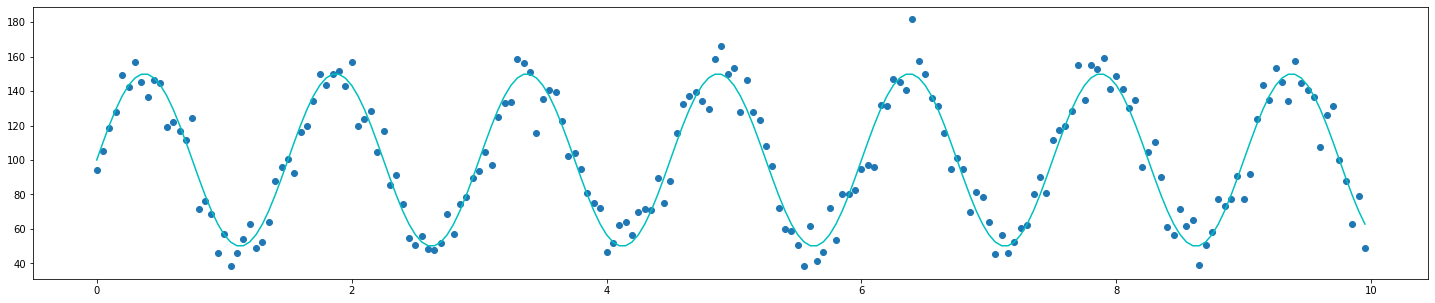

In [67]:
fpga_time = np.arange(np.size(fpga))
plt.figure(figsize=(25, 5))
plt.scatter(time_vec, noisy_wave)
plt.plot(time_vec, wave, 'c')
#plt.scatter(fpga_time, fpga/2)
plt.show()

In [76]:
fpga_sig = np.array([3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,240,240,240,0,3,6,3,5,16,240,240,240,0,0])
print(len(fpga_sig))
fpga_sig = fpga_sig/2
t = np.arange(len(fpga_sig))


163


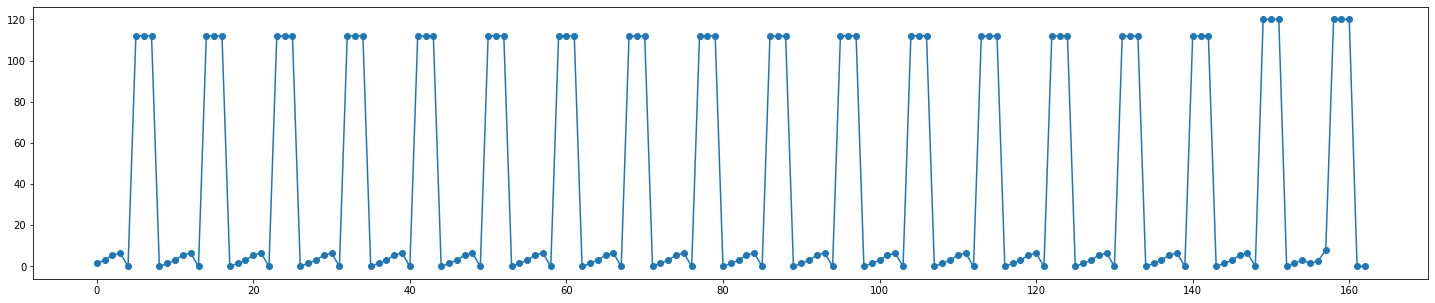

In [78]:
plt.figure(figsize=(25, 5))
plt.plot(t, fpga_sig, '-o')

Text(0, 0.5, 'power')

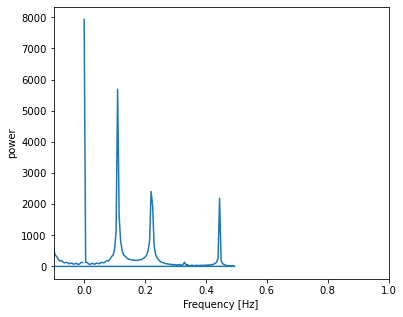

In [50]:
# The FFT of the signal
fpga_fft = fftpack.fft(fpga_sig)

# And the power (sig_fft is of complex dtype)
fpga_power = np.abs(fpga_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(fpga_sig.size, d=1)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.xlim(-.1,1)
plt.plot(sample_freq, fpga_power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')

Text(0, 0.5, 'power')

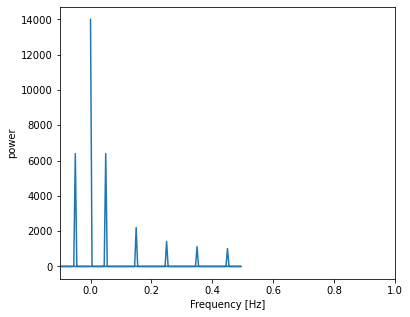

In [51]:
# The FFT of the signal
input_fft = fftpack.fft(input_sig)

# And the power (sig_fft is of complex dtype)
input_power = np.abs(input_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(fpga_sig.size, d=1)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.xlim(-.1,1)
plt.plot(sample_freq, input_power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')

## Getting the coefficients

In [52]:
numtaps = 4 #the higher it is, the more precise

In [53]:
f = 0.1

c = signal.firwin(numtaps, f)
#print(c)

The trasformation law is:
$$Y[n]=C_0X[n]+C_1X[n-1]+C_2X[n-2]+C_3X[n-3]$$

In [54]:
python_sig = lfilter(c, 1.0, input_sig)

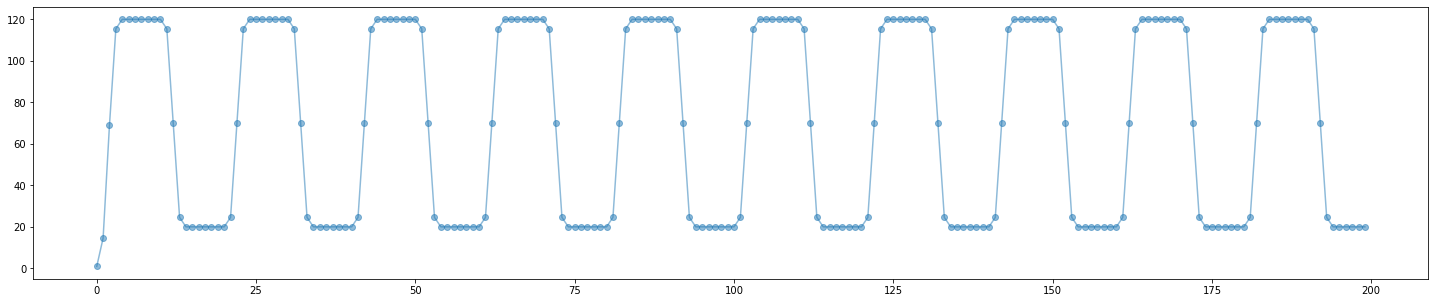

In [55]:
plt.figure(figsize=(25, 5))
plt.plot(t, python_sig, '-o', alpha = .5)